<h2>BigQuery interface with Python</h2> <br>
Here's a <a href="https://blog.morizyun.com/python/library-bigquery-google-cloud.html">basic tutorial on the topic</a>:<br>
<p>

Make sure to complete all of these steps before you execute this code:

<ul>
    <li>Log into your Google Cloud account via your Google credentials.</li>
    <li>Create a service account</li>
    <li>Download the JSON credentials file to a diectory you can access</li>
</ul>

In [5]:
pip install google-cloud-bigquery

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Initialise
from google.cloud import bigquery
from google.cloud import bigquery_storage

In [9]:
# Make sure to put your credentials file in
# the directory you're running this from
# and check it is so with this command

import os
os.listdir(".")

['posts_and_users_top10.csv',
 'bank-names.txt',
 '.config',
 'Music',
 '.condarc',
 '.docker',
 'bank.csv',
 'BankMarketing.ipynb',
 'Untitled1.ipynb',
 '.DS_Store',
 'week6',
 '.CFUserTextEncoding',
 '.xonshrc',
 'MySQLConnect.ipynb',
 'anaconda_projects',
 'Untitled.ipynb',
 '.zshrc',
 '.local',
 'Pictures',
 '.zprofile',
 'working folder',
 '.zsh_history',
 'Untitled2.ipynb',
 'bda-assignment-parta',
 '.ipython',
 'Desktop',
 'Library',
 '.matplotlib',
 '.lesshst',
 'bank-full.csv',
 'Dec2014Flights.csv',
 'pokemon.csv',
 'videos',
 'Public',
 '.tcshrc',
 '.virtual_documents',
 '.anaconda',
 'melodic-metrics-461803-m0-6d1589c9813a.json',
 'Movies',
 'Applications',
 '.Trash',
 'IdeaProjects',
 '.ipynb_checkpoints',
 '.jupyter',
 '.npm',
 'Documents',
 '.mysql_history',
 'google_stock_price.csv',
 '.vscode',
 '.m2',
 '.bash_profile',
 'posts_and_users.csv',
 'Downloads',
 '.continuum',
 '.gitconfig',
 'melodic-metrics-461803-m0-a964ed811ce5.json',
 '.viminfo',
 '.zsh_sessions',
 '.c

In [11]:
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "melodic-metrics-461803-m0-6d1589c9813a.json"

In [13]:
# Instantiates a client
from google.cloud import bigquery
bigquery_client = bigquery.Client()
# bqstorageclient = bigquery_storage.BigQueryReadClient()

In [15]:
query_string = ('SELECT name FROM `bigquery-public-data.usa_names.usa_1910_2013` '
                   'WHERE state= "TX" '
                    'LIMIT 100')

results = bigquery_client.query(query_string).result()  # Waits for job to complete.
for row in results:
    print(row.name)

Willie
Flora
Stella
Esther
Erma
Katie
Ethel
Cora
Margarita
Mae
Mamie
Eula
Nancy
Ethel
Virginia
Nina
Beatrice
Juana
Nancy
Thelma
Virgie
Ella
Norma
Eunice
Elvira
Dollie
Mamie
Nellie
Laverne
Jessie
Johnnie
Alice
Dolores
Margarita
Doris
Frances
Addie
Beulah
Charlotte
Dixie
Eddie
Nadine
Faye
Mae
Estella
Antonia
Ann
Dominga
Ila
Olivia
Nell
Estella
Geneva
Eula
Gussie
Bessie
Kathryn
Evelyn
Virgie
Bennie
Jeanette
Dixie
Winnie
Bettie
Beulah
Pearl
Essie
Francis
Elsie
Joyce
Katie
Geneva
Mamie
Margarita
Elisa
Frankie
Lila
Estelle
Estella
Lillian
Janie
Eugenia
Eunice
Lois
Mabel
Alice
Norma
Geneva
Ruth
Tommie
Viola
Connie
Ida
Grace
Paula
Marjorie
Carmen
Lee
Linda
Elida


In [16]:
!pip install db-dtypes

In [19]:
sof_query_string = ('SELECT name FROM `bigquery-public-data.usa_names.usa_1910_2013` '
                   'WHERE state= "TX" '
                    'LIMIT 100')

results = bigquery_client.query(query_string).result()  # Waits for job to complete.
for row in results:
    print(row.name)

Willie
Flora
Stella
Esther
Erma
Katie
Ethel
Cora
Margarita
Mae
Mamie
Eula
Nancy
Ethel
Virginia
Nina
Beatrice
Juana
Nancy
Thelma
Virgie
Ella
Norma
Eunice
Elvira
Dollie
Mamie
Nellie
Laverne
Jessie
Johnnie
Alice
Dolores
Margarita
Doris
Frances
Addie
Beulah
Charlotte
Dixie
Eddie
Nadine
Faye
Mae
Estella
Antonia
Ann
Dominga
Ila
Olivia
Nell
Estella
Geneva
Eula
Gussie
Bessie
Kathryn
Evelyn
Virgie
Bennie
Jeanette
Dixie
Winnie
Bettie
Beulah
Pearl
Essie
Francis
Elsie
Joyce
Katie
Geneva
Mamie
Margarita
Elisa
Frankie
Lila
Estelle
Estella
Lillian
Janie
Eugenia
Eunice
Lois
Mabel
Alice
Norma
Geneva
Ruth
Tommie
Viola
Connie
Ida
Grace
Paula
Marjorie
Carmen
Lee
Linda
Elida


In [20]:
query_string = """
  SELECT
  store_number,
  upper(store_name) as store_name,
  upper(county) as county,
  ANY_VALUE(store_location) as wkt,
  ROUND(SUM(volume_sold_liters),2) AS liters_sold
FROM
  `bigquery-public-data.iowa_liquor_sales.sales`
GROUP BY
  store_number,
  store_name,
  county,
  ST_ASTEXT(store_location)
ORDER BY
  store_number,
  store_name,
  liters_sold DESC
LIMIT 10"""

In [23]:
iowaliq_df = (
    bigquery_client.query(query_string)
    .to_dataframe()
)

iowaliq_df

,store_number,store_name,county,wkt,liters_sold
0,10003,TOP SHELF LIQUOR / IOWA CITY,JOHNSON,POINT(-91.540728892 41.65487474),4089.23
1,10003,TOP SHELF LIQUOR / IOWA CITY,JOHNSON,POINT(-77.31187 35.96278),3647.59
2,10003,TOP SHELF LIQUOR / IOWA CITY,JOHNSON,POINT(-91.54408 41.64788),2549.99
3,10003,TOP SHELF LIQUOR / IOWA CITY,JOHNSON,POINT(-91.544079711 41.648079581),2435.99
4,10003,TOP SHELF LIQUOR / IOWA CITY,JOHNSON,POINT(-91.54362 41.64755),1084.18
5,10003,TOP SHELF LIQUOR / IOWA CITY,JOHNSON,POINT(-91.5407288919999 41.65487474),1067.60
6,10003,TOP SHELF LIQUOR / IOWA CITY,JOHNSON,None,972.64
7,10004,JACK & JILL STORE / WEST BRANCH,CEDAR,POINT(-91.34341301 41.670494006),8512.04
8,10004,JACK & JILL STORE / WEST BRANCH,CEDAR,POINT(-91.34353 41.67084),2881.75
9,10004,JACK & JILL STORE / WEST BRANCH,CEDAR,POINT(-91.34572 41.67141),2099.70


In [25]:
query_job_3 = bigquery_client.query("""
#standardSQL
SELECT
  nameOfAirline,
  COUNT(*) numFlights
FROM
  `bigquery-samples.airline_ontime_data.flights` AS flights
JOIN (
  SELECT
    airline nameOfAirline,
    code
  FROM
    `bigquery-samples.airline_ontime_data.airline_id_codes`) AS codes
ON
  flights.airline_code = codes.code
GROUP BY
  airline,
  nameOfAirline
ORDER BY
  numFlights DESC""")

results_3 = query_job_3.result()  # Waits for job to complete.

In [26]:
for row in results_3:
    print("{}: {}".format(row.nameOfAirline, row.numFlights))

Southwest Airlines Co.: WN: 11723133
American Airlines Inc.: AA: 6822440
Delta Air Lines Inc.: DL: 6607317
SkyWest Airlines Inc.: OO: 5158971
United Air Lines Inc.: UA: 5043578
American Eagle Airlines Inc.: MQ: 5020385
US Airways Inc.: US (Merged with America West 9/05. Reporting for both starting 10/07.): 4736226
Northwest Airlines Inc.: NW: 3429596
ExpressJet Airlines Inc. (1): XE: 3366940
ExpressJet Airlines Inc.: EV: 3211589
Continental Air Lines Inc.: CO: 2867310
AirTran Airways Corporation: FL: 2182427
Comair Inc.: OH: 1698485
Alaska Airlines Inc.: AS: 1640564
JetBlue Airways: B6: 1607565
Mesa Airlines Inc.: YV: 1480194
Pinnacle Airlines Inc.: 9E: 1007834
America West Airlines Inc.: HP (Merged with US Airways 9/05.Stopped reporting 10/07.): 768655
Independence Air: DH: 664935
Frontier Airlines Inc.: F9: 658538
Hawaiian Airlines Inc.: HA: 547494
ATA Airlines d/b/a ATA: TZ: 206007
Aloha Air Cargo: KH: 88336
Virgin America: VX: 49966


In [54]:
popular_tags_by_debut_year = bigquery_client.query("""
              SELECT tag, COUNT(*) AS freq FROM 
                      (SELECT TRIM(skill) AS tag,
                      FROM `bigquery-public-data.stackoverflow.posts_questions`,
                      UNNEST(SPLIT(tags, '|')) AS skill
                      where EXTRACT(YEAR FROM TIMESTAMP(creation_date)) = 2008
                      )
              GROUP BY tag
              ORDER BY freq DESC
              limit 10
          """).to_dataframe()

popular_tags_by_debut_year

,tag,freq
0,c#,7473
1,.net,5877
2,java,4288
3,asp.net,3771
4,c++,3091
5,javascript,2732
6,php,2226
7,python,2055
8,sql-server,2054
9,sql,2023


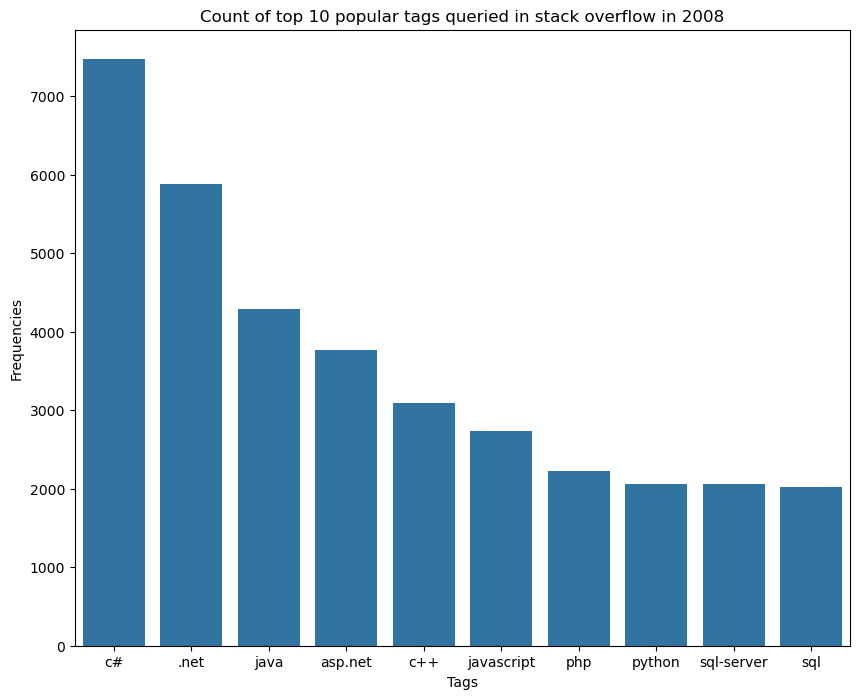

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot(data=popular_tags_by_debut_year, x = 'tag',y='freq')

plt.title("Count of top 10 popular tags queried in stack overflow in 2008")
plt.xlabel("Tags")
plt.ylabel("Frequencies")
plt.show()

In [88]:
Popular_Tags = bigquery_client.query("""
SELECT year, tag, freq
FROM (SELECT year, tag, COUNT(*) AS freq, ROW_NUMBER() OVER (PARTITION BY year ORDER BY COUNT(*) DESC) AS rank
        FROM (
              SELECT TRIM(skill) AS tag,
              EXTRACT(YEAR FROM TIMESTAMP(creation_date)) AS year
              FROM `bigquery-public-data.stackoverflow.posts_questions`,
              UNNEST(SPLIT(tags, '|')) AS skill
            )
        GROUP BY year, tag
        ORDER BY year, freq DESC)
WHERE rank <= 10
ORDER BY year, freq DESC
""").to_dataframe()

Popular_Tags

,year,tag,freq
0,2008,c#,7473
1,2008,.net,5877
2,2008,java,4288
3,2008,asp.net,3771
4,2008,c++,3091
...,...,...,...
145,2022,html,50524
146,2022,android,43937
147,2022,node.js,40314
148,2022,r,39675


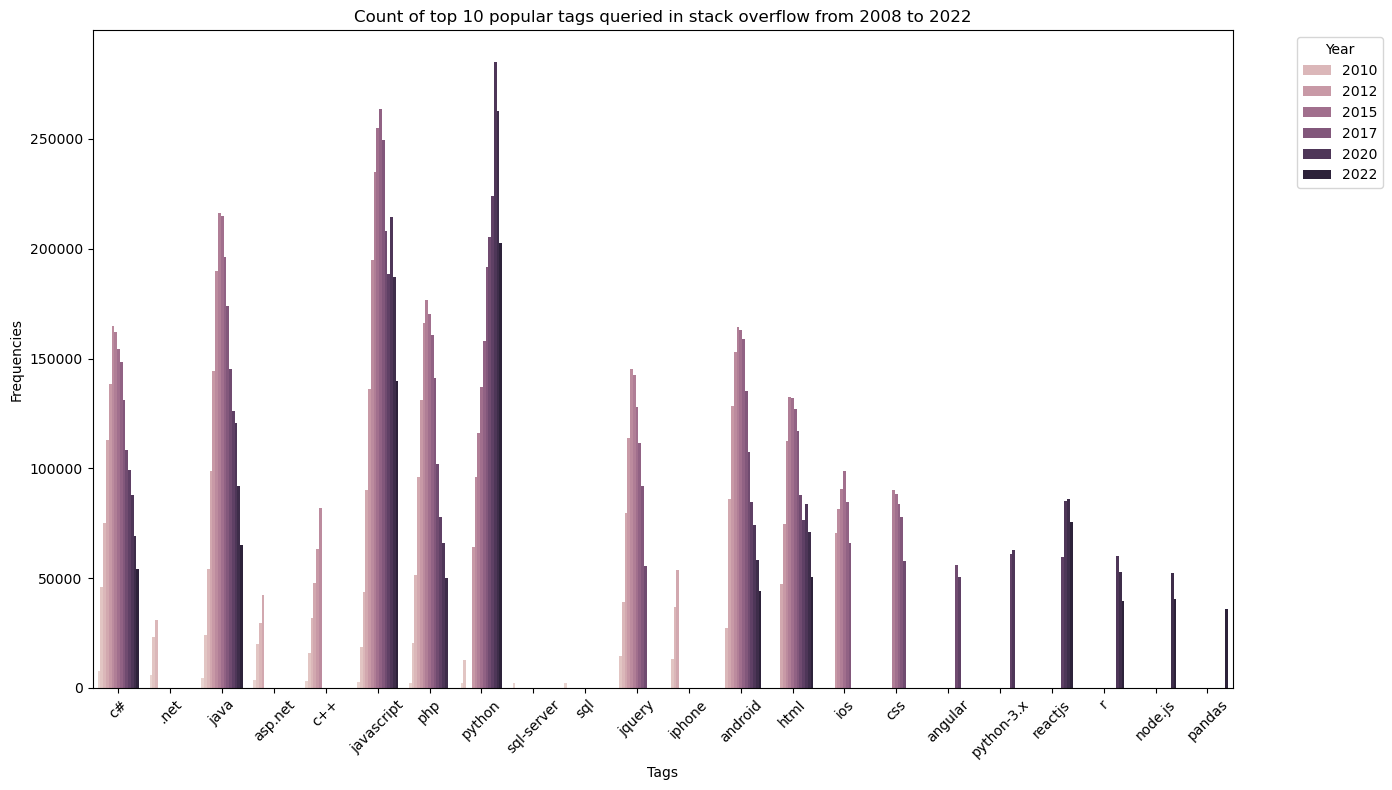

In [102]:
Popular_Tags['year'] = Popular_Tags['year'].astype(int)
Popular_Tags['freq'] = Popular_Tags['freq'].astype(int)

# Set figure size
plt.figure(figsize=(14, 8))

sns.barplot(data= Popular_Tags, x='tag', y='freq', hue ='year')

plt.title("Count of top 10 popular tags queried in stack overflow from 2008 to 2022")
plt.xlabel("Tags")
plt.ylabel("Frequencies")
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [108]:
type(Popular_Tags)

pandas.core.frame.DataFrame

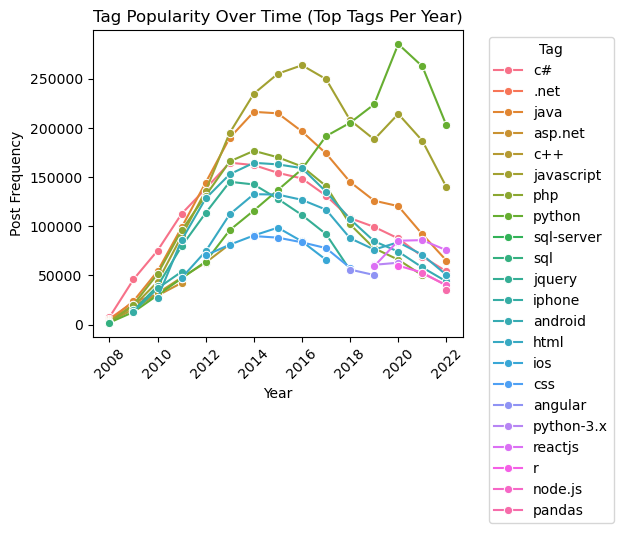

In [116]:
import pandas as pd

Popular_Tags['year'] = Popular_Tags['year'].astype(int)

sns.lineplot(data=Popular_Tags, x='year', y='freq', hue='tag', marker='o')

# Decorations
plt.title('Tag Popularity Over Time (Top Tags Per Year)')
plt.xlabel('Year')
plt.ylabel('Post Frequency')
plt.xticks(rotation=45)
plt.legend(title='Tag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [33]:
posts_and_users= bigquery_client.query("""select posts.id as post_id, posts.creation_date as created, posts.title as post_title, 
posts.view_count as view_count, users.id as user_id,  posts.owner_display_name as user_name,
users.location as location
from `bigquery-public-data.stackoverflow.stackoverflow_posts` posts ,`bigquery-public-data.stackoverflow.users` users
where posts.owner_user_id = users.id
order by view_count desc
""").to_dataframe()

posts_and_users.head(10)

,post_id,created,post_title,view_count,user_id,user_name,location
0,5585779,2011-04-07 18:27:54.270000+00:00,Converting String to Int in Java?,3364629,537967,None,None
1,927358,2009-05-29 18:09:14.627000+00:00,How do you undo the last commit?,3339277,89904,None,None
2,1789945,2009-11-24 13:04:29.157000+00:00,How can I check if one string contains another...,3036124,131679,None,None
3,503093,2009-02-02 12:54:16.867000+00:00,How can I make a page redirect using jQuery?,2946923,44984,venkatachalam,"Salem, Tamil Nadu, India"
4,2003505,2010-01-05 01:12:15.867000+00:00,Delete a Git branch both locally and remotely,2774568,95592,None,"Independence, Missouri United States"
5,184618,2008-10-08 20:08:07.967000+00:00,What is the best comment in source code you ha...,2376668,15985,endpoint,"London, England United Kingdom"
6,901712,2009-05-23 15:16:39.917000+00:00,How do I check if a checkbox is checked?,2367628,111435,None,India
7,114543,2008-09-22 12:27:57.510000+00:00,Horizontally center a div in a div,2261660,20403,Lukas,Slovakia
8,9329446,2012-02-17 13:51:48.683000+00:00,For-each over an array in JavaScript?,2236283,1140876,None,Netherlands
9,4114095,2010-11-06 16:58:14.550000+00:00,Revert Git repo to a previous commit,2222238,111174,None,None


In [34]:
posts_and_users.to_csv("posts_and_users.csv", index=False)

In [35]:
posts_and_users.head(10).to_csv("posts_and_users_top10.csv", index=False)

In [ ]:
posts_and_users_by_year= bigquery_client.query("""select posts.id as post_id, posts.creation_date as created, posts.title as post_title, 
posts.view_count as view_count, users.id as user_id,  posts.owner_display_name as user_name,
users.location as location,
EXTRACT(YEAR FROM posts.creation_date) as year                                              
from `bigquery-public-data.stackoverflow.stackoverflow_posts` posts ,`bigquery-public-data.stackoverflow.users` users
where posts.owner_user_id = users.id
and EXTRACT(YEAR FROM posts.creation_date) BETWEEN 2008 and 2021
order by view_count desc
""").to_dataframe()

TypeError: QueryJob.to_dataframe() got an unexpected keyword argument 'index_cols'

In [52]:
type(posts_and_users_by_year)



pandas.core.frame.DataFrame

In [54]:
import pandas as pd

In [60]:
posts_and_users_by_year

,post_id,created,post_title,view_count,user_id,user_name,location,year
0,5585779,2011-04-07 18:27:54.270000+00:00,Converting String to Int in Java?,3364629,537967,None,None,2011
1,927358,2009-05-29 18:09:14.627000+00:00,How do you undo the last commit?,3339277,89904,None,None,2009
2,1789945,2009-11-24 13:04:29.157000+00:00,How can I check if one string contains another...,3036124,131679,None,None,2009
3,503093,2009-02-02 12:54:16.867000+00:00,How can I make a page redirect using jQuery?,2946923,44984,venkatachalam,"Salem, Tamil Nadu, India",2009
4,2003505,2010-01-05 01:12:15.867000+00:00,Delete a Git branch both locally and remotely,2774568,95592,None,"Independence, Missouri United States",2010
...,...,...,...,...,...,...,...,...
30396346,2654985,2010-04-16 17:28:39.190000+00:00,None,<NA>,229930,None,Colorado Springs,2010
30396347,33022306,2015-10-08 17:25:59.007000+00:00,None,<NA>,5414993,None,"Jaipur, Rajasthan, India",2015
30396348,35412932,2016-02-15 15:18:59.770000+00:00,None,<NA>,862382,None,"Minneapolis, MN",2016
30396349,11031817,2012-06-14 11:08:25.560000+00:00,None,<NA>,1329111,None,The Netherlands,2012
